In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\Run Hussain\Desktop\Python Coding\Python_youtube_Analysis-master\video_id_info.csv', on_bad_lines='skip')

C:\Users\Run Hussain\AppData\Local\Temp\ipykernel_10036\1739293778.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'C:\Users\Run Hussain\Desktop\Python Coding\Python_youtube_Analysis-master\video_id_info.csv', on_bad_lines='skip')


In [3]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [4]:
pd.isnull(df).sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [5]:
df.dropna(inplace = True)

### Perform Sentiment Analysis

In [28]:
#TextBlob is a Python library for processing textual data. It provides a simple API for common natural language processing (NLP) tasks 
#!pip install textblob
!pip install -U textblob

In [7]:
from textblob import TextBlob

In [8]:
df.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [9]:
df.shape

(691374, 4)

In [10]:
#creating a new DataFrame (sample_df) by selecting the first 1000 rows of an existing DataFrame (df).
#This can be useful for working with a smaller subset of data, such as when you want to perform quick analyses or tests without using the entire dataset.

sample_df=df[0:10000]

In [11]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️") # normal text box

TextBlob("Logan Paul it's yo big day ‼️‼️‼️")

In [12]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment #attribute

Sentiment(polarity=0.0, subjectivity=0.1)

In [13]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity  ### its a neutral sentence !

0.0

In [14]:
#performing sentiment for each row of comment_text'
#polarity = []--black list

#for comment in df['comment_text']:
    #TextBlob(comment).sentiment.polarity
    #polarity.append(TextBlob(comment).sentiment.polarity)

#if there is a black text then you will get the exception error. To avoid the exception we have to use the try exception block

#syntax 
#try:
    # Code that might raise an exception
# except :
    # Code to handle the exception

polarity = []

for comment in df['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity) # Storing Results Sequentially, we always want to add at the end.
    except:
        polarity.append(0)

In [16]:
len(polarity)

691374

In [17]:
### Inserting polarity values into comments data frame while defining feature name as "polarity"
df['polarity']  = polarity

In [18]:
df.head(5)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


### Wordcloud Analysis of your data

In [ ]:
#Word cloud analysis is a visual representation technique that displays the most frequently occurring words in a text dataset

In [27]:
#!pip install wordcloud
!pip install wordcloud

In [21]:
filter1 = df['polarity']==1
comments_positive=df[filter1]

In [22]:
filter2 = df['polarity']==-1
comments_negative= df[filter2]

In [23]:
#Stopwords are common words like "the," "is," and "and" that are often removed from text during analysis because they don't carry significant meaning.
from wordcloud import WordCloud, STOPWORDS

In [24]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [25]:
df['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [26]:
type(df['comment_text'])

pandas.core.series.Series

In [29]:
### for wordcloud , we need to frame our 'comment_text' feature into string ..
# joins all the text data from the 'comment_text' column in the DataFrame 'comments_positive' into a single string, separated by spaces.
Total_Comments_Positive= ''.join(comments_positive['comment_text'])

In [32]:
#This line of code creates a word cloud from the text data in `total_comments_positive`, using a predefined set of stopwords to filter out common words that don't carry significant meaning.
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(Total_Comments_Positive)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

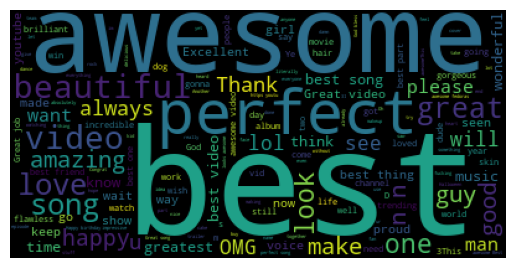

In [34]:
#The imshow() function in matplotlib is used to display images, and in this case, it's used to display the word cloud generated by the WordCloud library.
plt.imshow(wordcloud)
plt.axis('off')

### Conclusion-->> positive Users are emphasizing more on best , awesome , perfect , amazing , look , happy etc..

In [36]:
Total_Negative_Words= ''.join(comments_negative['comment_text'])

In [38]:
wordcloud= WordCloud(stopwords=set(STOPWORDS)).generate(Total_Negative_Words)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

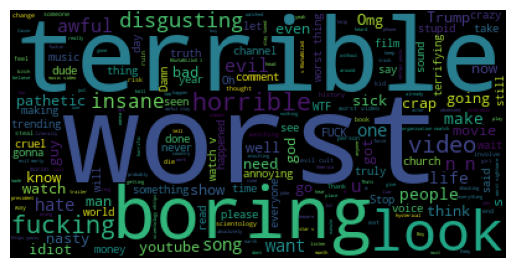

In [39]:
### Conclusion-->> Negative Users are emphasizing more on Terrible , worst ,horrible ,boring , disgusting etc..
plt.imshow(wordcloud) 
plt.axis('off')

### Perform Emoji's Analysis

In [43]:
#!pip install emoji==2.10.1
## 2.10.0 is a most stable version till date , hence installing this version makes sense !
!pip install emoji==2.10.1 

In [44]:
import emoji

In [45]:
emoji.__version__

'2.10.1'

In [46]:
df['comment_text'].head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [47]:
comment = 'trending 😉'

In [48]:
#The code snippet you provided is a list comprehension that filters out characters from a string (comment) if they are present in the emoji.
#EMOJI_DATA dictionary. It's a way to extract emojis from a text string.
[char for char in comment if char in emoji.EMOJI_DATA]

['😉']

In [56]:
## lets try to write above code in a more simpler & readable way :
emoji_list = []

for char in comment:
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)

emoji_list

['😉']

In [57]:
all_emojis_list = []

for comment in df['comment_text'].dropna(): ## in case u have missing values , call dropna()
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

In [58]:
all_emojis_list[0:10]# 1st 10 emojis

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']